# Test notebook to verify utils.py and rule2graph.py work correctly

In [1]:
import sys
sys.path.append('../')

from src.utils import get_controversial_rules, get_controversy_info, to_pyg_data
from src.rule2graph import TruthTableGraph, ECARule, EvolutionGraph

# Test 1: Controversial Rules
print("High Priority Controversial Rules")
high_priority = get_controversial_rules('high')
print(high_priority)

print("\n Rule 54 Controversy Info")
info = get_controversy_info(54)
print(info)

# Test 2: Multi-IC Evolution Graphs
rule54 = ECARule(54)
ev_graph = EvolutionGraph(rule54, width=50, steps=50)

print("\n Testing Multi-IC for Rule 54")
multi_ic_graphs = ev_graph.build_multi_ic(n_samples=3)
for g in multi_ic_graphs:
    print(f"IC Type: {g['initial_condition']}")
    print(f"  Nodes: {len(g['nodes'])}, Edges: {len(g['edges'])}")
    print(f"  Feature shape: {g['node_features'].shape}")

# Test 3: PyTorch Geometric Conversion
tt_graph = TruthTableGraph(rule54)
graph_data = tt_graph.build()

print("\n=== Testing PyG Conversion ===")
pyg_data = to_pyg_data(graph_data)
print(f"PyG Data: {pyg_data}")
print(f"  x shape: {pyg_data.x.shape}")
print(f"  edge_index shape: {pyg_data.edge_index.shape}")
print(f"  y: {pyg_data.y}")


High Priority Controversial Rules
[54, 62, 73, 224]

 Rule 54 Controversy Info
{'wolfram_label': 'IV', 'disputed_as': ['III'], 'reason': 'Gliders similar to Rule 110 but universal computation unclear', 'priority': 'high'}

 Testing Multi-IC for Rule 54
IC Type: single_cell
  Nodes: 51, Edges: 50
  Feature shape: (51, 3)
IC Type: random_low
  Nodes: 51, Edges: 50
  Feature shape: (51, 3)
IC Type: random_medium
  Nodes: 51, Edges: 50
  Feature shape: (51, 3)

=== Testing PyG Conversion ===
PyG Data: Data(x=[8, 4], edge_index=[2, 40], y=[1], rule_number=54, graph_type='truth_table')
  x shape: torch.Size([8, 4])
  edge_index shape: torch.Size([2, 40])
  y: tensor([3])



=== Rule 54 vs Other Class IV Rules ===

Rule 41 (IV):
  Truth-table distance: 2.2361
  Dependency distance: 2.2361

Rule 106 (IV):
  Truth-table distance: 2.0000
  Dependency distance: 2.0000

Rule 110 (IV):
  Truth-table distance: 1.7321
  Dependency distance: 1.7321

CASE STUDY: Rule 54

Wolfram Classification: IV

CONTROVERSIAL RULE
  Disputed as: ['III']
  Reason: Gliders similar to Rule 110 but universal computation unclear
  Priority: high

--- IC Sensitivity Analysis ---
  Final density std: 0.1229
  Entropy std: 0.0167
  Hamming distance std: 1.1101
HIGH IC SENSITIVITY DETECTED




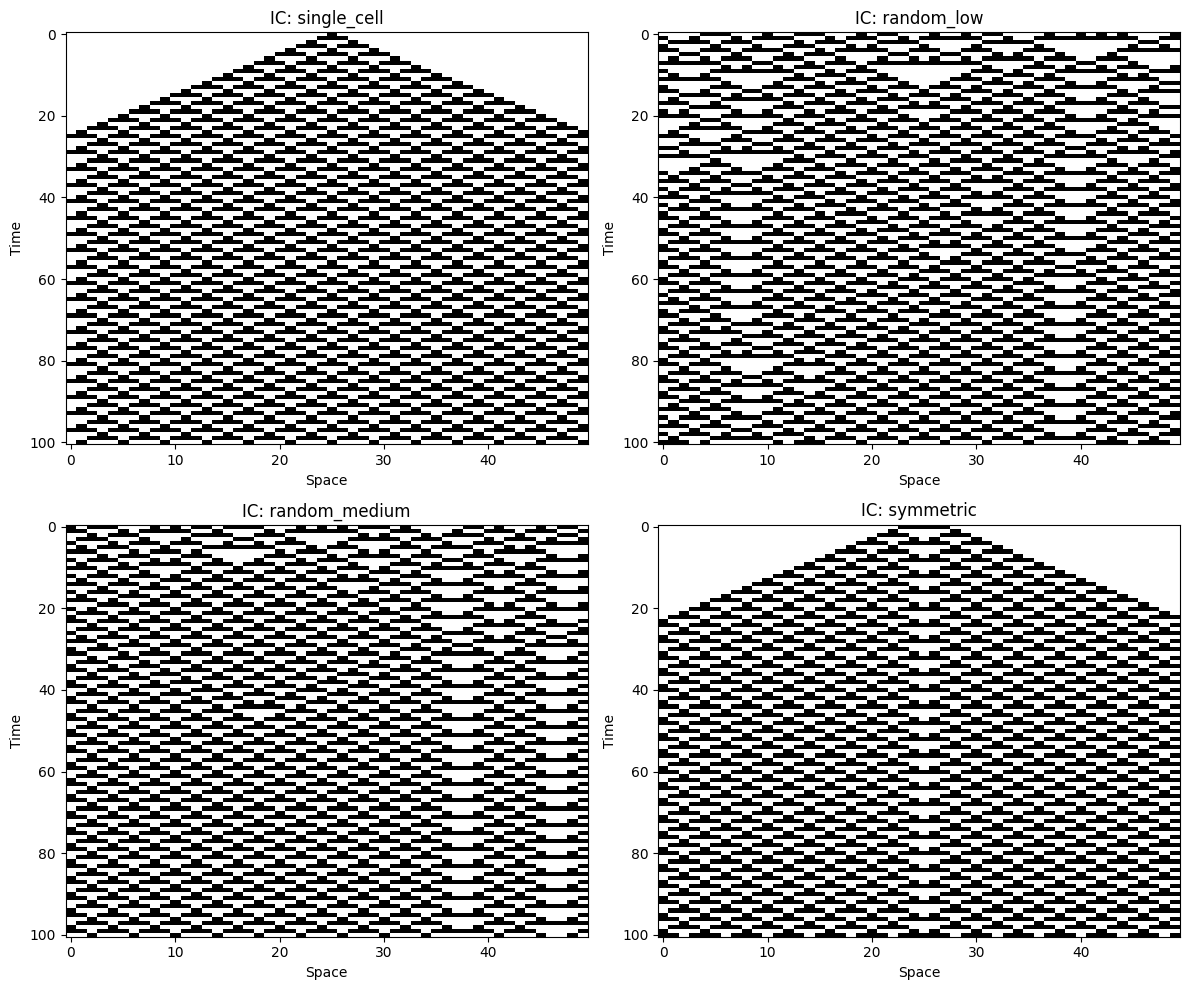

In [2]:
from src.case_study import analyze_rule_54, RuleCaseStudy

# Quick analysis
study = analyze_rule_54()

# Get all graph representations
graphs = study.extract_all_graphs()

# Visualize evolution under different ICs
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for idx, graph_data in enumerate(graphs['evolution']):
    ax = axes[idx // 2, idx % 2]
    ax.imshow(graph_data['spacetime'], cmap='binary', aspect='auto')
    ax.set_title(f"IC: {graph_data['initial_condition']}")
    ax.set_xlabel('Space')
    ax.set_ylabel('Time')

plt.tight_layout()
plt.savefig('../results/rule54_multi_ic.png', dpi=150)
plt.show()